In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
 
import os

In [2]:
mu, sigma = 0, 0.1 # 분산, 표준편차

# 전체 모집단을 위한 임의의 데이터 
# 정규분포 값으로 평균 0 분산 0.1인 값을 생성
population = np.random.normal(mu, sigma, 10000000)

/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

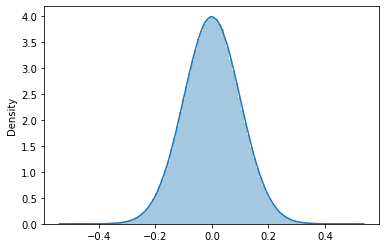

In [3]:
sns.distplot(population, bins=100)

/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

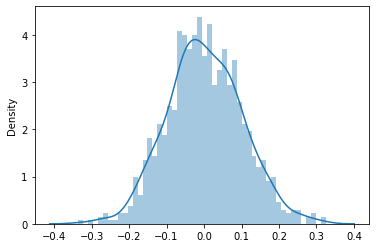

In [5]:
# 표본집단은 모집단의 특징을 거의 그대로 갖고 있음
samples = np.random.choice(population, 1000)
sns.distplot(samples, bins=50)

In [7]:
population.mean(), samples.mean()

(-1.6891731207428114e-05, 0.002035756132700313)

In [8]:
os.listdir('data')

['StudentsPerformance.csv']

In [9]:
DATA = 'data'
FILENAME = 'StudentsPerformance.csv'
DATA_PATH = os.path.join(DATA, FILENAME)
df = pd.read_csv(DATA_PATH)
df.shape

(1000, 8)

In [13]:
# 총 1,000개 중 80% 데이터를 랜덤하게 뽑음
# selected_index = np.random.choice(df.index, int(df['gender'].count() * 0.8))
# df.loc[selected_index]
# or

# df.sample(frac = 0.8)
# or

from sklearn.model_selection import train_test_split

In [16]:
train_df, test_df = train_test_split(df, test_size=0.8)
train_df.shape, test_df.shape

((200, 8), (800, 8))

In [17]:
# 인종그룹 별 비율
df['race/ethnicity'].value_counts(normalize=True)

group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: race/ethnicity, dtype: float64

In [18]:
train_df['race/ethnicity'].value_counts(normalize=True)

group C    0.280
group B    0.240
group D    0.235
group E    0.160
group A    0.085
Name: race/ethnicity, dtype: float64

In [19]:
test_df['race/ethnicity'].value_counts(normalize=True)

group C    0.32875
group D    0.26875
group B    0.17750
group E    0.13500
group A    0.09000
Name: race/ethnicity, dtype: float64

In [20]:
df['reading score'].mean(), train_df['reading score'].mean(), test_df['reading score'].mean()

(69.169, 69.07, 69.19375)

In [22]:
# 평균의 표준편차
np.std([df['reading score'].mean(), train_df['reading score'].mean(), test_df['reading score'].mean()])

0.053466110761865776

## 층화추출 Stratified random sampling

In [27]:
train_df, test_df = train_test_split(df, test_size = 0.6, stratify=df['race/ethnicity'])
train_df.shape, test_df.shape

((400, 8), (600, 8))

In [28]:
# 인종그룹 별 비율
df['race/ethnicity'].value_counts(normalize=True)

group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: race/ethnicity, dtype: float64

In [29]:
train_df['race/ethnicity'].value_counts(normalize=True)

group C    0.3175
group D    0.2625
group B    0.1900
group E    0.1400
group A    0.0900
Name: race/ethnicity, dtype: float64

In [30]:
test_df['race/ethnicity'].value_counts(normalize=True)

group C    0.320000
group D    0.261667
group B    0.190000
group E    0.140000
group A    0.088333
Name: race/ethnicity, dtype: float64

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit